In [1]:
setwd('~/Downloads/proj/')

library(data.table)
library(edgeR)
library(EDASeq)
library(RUVSeq)
library(affycoretools)
library(ggplot2)
library(DESeq2)
require(dplyr)
require(stringr)

#project directories, and libraries loaded

MM_cell_line = data.frame(fread("HMCL66_HTSeq_GENE_Counts_v2.txt"))
MM_patients = data.frame(fread("MMRF_CoMMpass_IA13a_E74GTF_HtSeq_Gene_Counts.txt"))

#reading and creating data frames from gene count data

head(MM_cell_line)
head(MM_patients)
length(MM_patients[2,])

#checking output head

Loading required package: limma
Loading required package: Biobase
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following object is masked from ‘package:limma’:

    plotMA

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colMeans,
    colnames, colSums, dirname, do.call, duplicated, eval, evalq,
    Filter, Find, get, grep, grepl, intersect, is.unsorted, lapply,
    lengths, Map, mapply, match, mget, order, paste, pmax, pmax.int,
    pmin, pmin.int, Position, rank, rbind, Reduce, rowMeans, rownames,
    rowSums, sapply, setdiff, sort, tab

Sample,GENE_NAME,ALMC1_DJ_p27,ALMC2_DJ_p11,AMO1_DSMZ_p8,ANBL6_DJ2_p13,COLO677_DSMZ_p8,Delta47_JCRB_p16,DP6_DJ_p7,EJM_DSMZ_p9,⋯,RPMI8226_ATCC_p7,SKMM1_p6,SKMM2_DSMZ_p17,U266_ATCC_p8,UTMC2_p6,VP6_DJ_p5,XG1_p5,XG2_p5,XG6_p5,XG7_p6
<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ENSG00000000003,TSPAN6,2,0,100,2,0,0,2,88,⋯,2,0,0,0,0,0,0,0,2,114
ENSG00000000005,TNMD,1,0,0,0,1,0,0,0,⋯,0,1,0,0,0,0,0,0,0,0
ENSG00000000419,DPM1,3949,4134,4795,8278,2262,2587,3607,2450,⋯,2694,1247,3263,3044,3108,4538,7336,4430,9279,13828
ENSG00000000457,SCYL3,1597,1513,2412,1988,1530,926,1415,573,⋯,665,994,497,1611,1603,1375,1426,893,1540,1660
ENSG00000000460,C1orf112,3072,1488,2193,4091,3208,1170,3614,1618,⋯,1472,1517,1346,2068,3128,1850,2522,2320,793,689
ENSG00000000938,FGR,0,22,701,5,2,4,89,4,⋯,0,125,777,50,1890,2315,1514,5,3776,847


GENE_ID,MMRF_2801_1_BM,MMRF_2718_1_BM,MMRF_2815_1_BM,MMRF_1656_1_BM,MMRF_2461_1_BM,MMRF_2531_2_PB,MMRF_2057_1_BM,MMRF_1910_1_BM,MMRF_2089_2_BM,⋯,MMRF_2379_1_BM,MMRF_1474_1_BM,MMRF_1641_1_BM,MMRF_1978_2_BM,MMRF_2795_1_BM,MMRF_2316_1_BM,MMRF_2606_2_BM,MMRF_2440_1_BM,MMRF_2731_1_BM,MMRF_1355_1_BM
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ENSG00000000003,17,999,85,9,801,20,12,16,4,⋯,2,186,102,347,128,17,11,3,18,6
ENSG00000000005,1,0,0,2,3,0,0,0,0,⋯,0,0,0,0,0,0,1,0,0,0
ENSG00000000419,1495,3271,2303,1234,1896,4400,2013,1745,1698,⋯,2459,1269,337,3347,1049,2545,1625,1253,1905,683
ENSG00000000457,231,809,203,1208,425,2793,710,922,853,⋯,734,771,327,392,90,406,857,548,808,393
ENSG00000000460,87,319,31,183,85,929,174,292,837,⋯,267,104,114,126,17,67,196,141,199,55
ENSG00000000938,318,105,119,190,2064,2952,12,351,498,⋯,46,14,303,2007,58,77,1037,11,174,22


[1] 893

In [2]:
ensembl_intersect = intersect(MM_cell_line$Sample, MM_patients$GENE_ID)

#finding genes in common and creating character vector of Ensembl Gene IDs

head(ensembl_intersect)

#checking output head

[1] "ENSG00000000003" "ENSG00000000005" "ENSG00000000419" "ENSG00000000457"
[5] "ENSG00000000460" "ENSG00000000938"

In [3]:
rownames(MM_cell_line) = MM_cell_line$Sample
rownames(MM_patients) = MM_patients$GENE_ID

#assigning rownames as ensembl gene IDs so as to be able to parse by ensembl Gene IDs

head(MM_cell_line)
head(MM_patients)

#checking output head

,Sample,GENE_NAME,ALMC1_DJ_p27,ALMC2_DJ_p11,AMO1_DSMZ_p8,ANBL6_DJ2_p13,COLO677_DSMZ_p8,Delta47_JCRB_p16,DP6_DJ_p7,EJM_DSMZ_p9,⋯,RPMI8226_ATCC_p7,SKMM1_p6,SKMM2_DSMZ_p17,U266_ATCC_p8,UTMC2_p6,VP6_DJ_p5,XG1_p5,XG2_p5,XG6_p5,XG7_p6
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ENSG00000000003,ENSG00000000003,TSPAN6,2,0,100,2,0,0,2,88,⋯,2,0,0,0,0,0,0,0,2,114
ENSG00000000005,ENSG00000000005,TNMD,1,0,0,0,1,0,0,0,⋯,0,1,0,0,0,0,0,0,0,0
ENSG00000000419,ENSG00000000419,DPM1,3949,4134,4795,8278,2262,2587,3607,2450,⋯,2694,1247,3263,3044,3108,4538,7336,4430,9279,13828
ENSG00000000457,ENSG00000000457,SCYL3,1597,1513,2412,1988,1530,926,1415,573,⋯,665,994,497,1611,1603,1375,1426,893,1540,1660
ENSG00000000460,ENSG00000000460,C1orf112,3072,1488,2193,4091,3208,1170,3614,1618,⋯,1472,1517,1346,2068,3128,1850,2522,2320,793,689
ENSG00000000938,ENSG00000000938,FGR,0,22,701,5,2,4,89,4,⋯,0,125,777,50,1890,2315,1514,5,3776,847


,GENE_ID,MMRF_2801_1_BM,MMRF_2718_1_BM,MMRF_2815_1_BM,MMRF_1656_1_BM,MMRF_2461_1_BM,MMRF_2531_2_PB,MMRF_2057_1_BM,MMRF_1910_1_BM,MMRF_2089_2_BM,⋯,MMRF_2379_1_BM,MMRF_1474_1_BM,MMRF_1641_1_BM,MMRF_1978_2_BM,MMRF_2795_1_BM,MMRF_2316_1_BM,MMRF_2606_2_BM,MMRF_2440_1_BM,MMRF_2731_1_BM,MMRF_1355_1_BM
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ENSG00000000003,ENSG00000000003,17,999,85,9,801,20,12,16,4,⋯,2,186,102,347,128,17,11,3,18,6
ENSG00000000005,ENSG00000000005,1,0,0,2,3,0,0,0,0,⋯,0,0,0,0,0,0,1,0,0,0
ENSG00000000419,ENSG00000000419,1495,3271,2303,1234,1896,4400,2013,1745,1698,⋯,2459,1269,337,3347,1049,2545,1625,1253,1905,683
ENSG00000000457,ENSG00000000457,231,809,203,1208,425,2793,710,922,853,⋯,734,771,327,392,90,406,857,548,808,393
ENSG00000000460,ENSG00000000460,87,319,31,183,85,929,174,292,837,⋯,267,104,114,126,17,67,196,141,199,55
ENSG00000000938,ENSG00000000938,318,105,119,190,2064,2952,12,351,498,⋯,46,14,303,2007,58,77,1037,11,174,22


In [4]:
MM_cell_line = MM_cell_line[ensembl_intersect, -1]
MM_patients = MM_patients[ensembl_intersect, -1]

MM_patient_ids = data.frame(colnames(MM_patients))
MM_patients_new = filter(MM_patient_ids, str_extract(MM_patient_ids[,1], "_[0-9]_") == "_1_")
keepc = colnames(MM_patients) %in% MM_patients_new[,1]
MM_patients = MM_patients[,keepc]

MM_combined = cbind(MM_cell_line, MM_patients)

#filtering MM_cell_line and MM_patients to only those genes in common and taking out 
    #Gene name and ensembl ID columns, then combining them

head(MM_cell_line)
head(MM_patients)
head(MM_combined)
length(MM_patients[2,])
#checking output head

,GENE_NAME,ALMC1_DJ_p27,ALMC2_DJ_p11,AMO1_DSMZ_p8,ANBL6_DJ2_p13,COLO677_DSMZ_p8,Delta47_JCRB_p16,DP6_DJ_p7,EJM_DSMZ_p9,FLAM76_JCRB_p10,⋯,RPMI8226_ATCC_p7,SKMM1_p6,SKMM2_DSMZ_p17,U266_ATCC_p8,UTMC2_p6,VP6_DJ_p5,XG1_p5,XG2_p5,XG6_p5,XG7_p6
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ENSG00000000003,TSPAN6,2,0,100,2,0,0,2,88,4,⋯,2,0,0,0,0,0,0,0,2,114
ENSG00000000005,TNMD,1,0,0,0,1,0,0,0,0,⋯,0,1,0,0,0,0,0,0,0,0
ENSG00000000419,DPM1,3949,4134,4795,8278,2262,2587,3607,2450,1388,⋯,2694,1247,3263,3044,3108,4538,7336,4430,9279,13828
ENSG00000000457,SCYL3,1597,1513,2412,1988,1530,926,1415,573,1013,⋯,665,994,497,1611,1603,1375,1426,893,1540,1660
ENSG00000000460,C1orf112,3072,1488,2193,4091,3208,1170,3614,1618,1507,⋯,1472,1517,1346,2068,3128,1850,2522,2320,793,689
ENSG00000000938,FGR,0,22,701,5,2,4,89,4,2,⋯,0,125,777,50,1890,2315,1514,5,3776,847


,MMRF_2801_1_BM,MMRF_2718_1_BM,MMRF_2815_1_BM,MMRF_1656_1_BM,MMRF_2461_1_BM,MMRF_2057_1_BM,MMRF_1910_1_BM,MMRF_2341_1_BM,MMRF_2501_1_BM,MMRF_1383_1_BM,⋯,MMRF_1731_1_BM,MMRF_2799_1_BM,MMRF_2379_1_BM,MMRF_1474_1_BM,MMRF_1641_1_BM,MMRF_2795_1_BM,MMRF_2316_1_BM,MMRF_2440_1_BM,MMRF_2731_1_BM,MMRF_1355_1_BM
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ENSG00000000003,17,999,85,9,801,12,16,43,594,693,⋯,1,49,2,186,102,128,17,3,18,6
ENSG00000000005,1,0,0,2,3,0,0,1,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENSG00000000419,1495,3271,2303,1234,1896,2013,1745,2403,1847,973,⋯,1751,2537,2459,1269,337,1049,2545,1253,1905,683
ENSG00000000457,231,809,203,1208,425,710,922,1203,1160,587,⋯,493,220,734,771,327,90,406,548,808,393
ENSG00000000460,87,319,31,183,85,174,292,478,218,107,⋯,104,50,267,104,114,17,67,141,199,55
ENSG00000000938,318,105,119,190,2064,12,351,555,37,21,⋯,3064,46,46,14,303,58,77,11,174,22


,GENE_NAME,ALMC1_DJ_p27,ALMC2_DJ_p11,AMO1_DSMZ_p8,ANBL6_DJ2_p13,COLO677_DSMZ_p8,Delta47_JCRB_p16,DP6_DJ_p7,EJM_DSMZ_p9,FLAM76_JCRB_p10,⋯,MMRF_1731_1_BM,MMRF_2799_1_BM,MMRF_2379_1_BM,MMRF_1474_1_BM,MMRF_1641_1_BM,MMRF_2795_1_BM,MMRF_2316_1_BM,MMRF_2440_1_BM,MMRF_2731_1_BM,MMRF_1355_1_BM
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ENSG00000000003,TSPAN6,2,0,100,2,0,0,2,88,4,⋯,1,49,2,186,102,128,17,3,18,6
ENSG00000000005,TNMD,1,0,0,0,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENSG00000000419,DPM1,3949,4134,4795,8278,2262,2587,3607,2450,1388,⋯,1751,2537,2459,1269,337,1049,2545,1253,1905,683
ENSG00000000457,SCYL3,1597,1513,2412,1988,1530,926,1415,573,1013,⋯,493,220,734,771,327,90,406,548,808,393
ENSG00000000460,C1orf112,3072,1488,2193,4091,3208,1170,3614,1618,1507,⋯,104,50,267,104,114,17,67,141,199,55
ENSG00000000938,FGR,0,22,701,5,2,4,89,4,2,⋯,3064,46,46,14,303,58,77,11,174,22


[1] 779

In [5]:
MM_cell_line_cpm = cpm(MM_cell_line[,-1])
MM_patients_cpm = cpm(MM_patients)

#getting counts per million for MM_cell_line, and MM_patients_cpm

head(MM_cell_line_cpm)
head(MM_patients_cpm)

#checking output head

,ALMC1_DJ_p27,ALMC2_DJ_p11,AMO1_DSMZ_p8,ANBL6_DJ2_p13,COLO677_DSMZ_p8,Delta47_JCRB_p16,DP6_DJ_p7,EJM_DSMZ_p9,FLAM76_JCRB_p10,FR4_p6,⋯,RPMI8226_ATCC_p7,SKMM1_p6,SKMM2_DSMZ_p17,U266_ATCC_p8,UTMC2_p6,VP6_DJ_p5,XG1_p5,XG2_p5,XG6_p5,XG7_p6
ENSG00000000003,0.02834975,0.0000000,1.622395,0.02336384,0.00000000,0.00000000,0.02991395,1.84606143,0.08252468,0.00000,⋯,0.04066095,0.00000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000000,0.03073836,1.460413
ENSG00000000005,0.01417488,0.0000000,0.000000,0.00000000,0.01371330,0.00000000,0.00000000,0.00000000,0.00000000,0.00000,⋯,0.00000000,0.02448497,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000000,0.00000000,0.000000
ENSG00000000419,55.97658401,51.2687903,77.793863,96.70295153,31.01947819,46.41255860,53.94981686,51.39602836,28.63606308,90.65327,⋯,54.77030556,30.53276243,65.452450,53.700359,41.32766,65.86048,109.42511,58.79794048,142.61060806,177.145577
ENSG00000000457,22.63727644,18.7638316,39.132179,23.22366123,20.98134466,16.61307664,21.16412278,12.02037725,20.89937457,33.76204,⋯,13.51976733,24.33806403,9.969313,28.420262,21.31539,19.95552,21.27047,11.85249681,23.66853502,21.265668
ENSG00000000460,43.54521805,18.4537881,35.579133,47.79074350,43.99225731,20.99060439,54.05451570,33.94235669,31.09117223,40.85974,⋯,29.92646243,37.14370537,26.999386,36.482372,41.59361,26.84925,37.61861,30.79260088,12.18775862,8.826533
ENSG00000000938,0.00000000,0.2728383,11.372992,0.05840961,0.02742659,0.07176275,1.33117097,0.08391188,0.04126234,62.23506,⋯,0.00000000,3.06062173,15.585827,0.882069,25.13169,33.59784,22.58310,0.06636336,58.03401832,10.850615


,MMRF_2801_1_BM,MMRF_2718_1_BM,MMRF_2815_1_BM,MMRF_1656_1_BM,MMRF_2461_1_BM,MMRF_2057_1_BM,MMRF_1910_1_BM,MMRF_2341_1_BM,MMRF_2501_1_BM,MMRF_1383_1_BM,⋯,MMRF_1731_1_BM,MMRF_2799_1_BM,MMRF_2379_1_BM,MMRF_1474_1_BM,MMRF_1641_1_BM,MMRF_2795_1_BM,MMRF_2316_1_BM,MMRF_2440_1_BM,MMRF_2731_1_BM,MMRF_1355_1_BM
ENSG00000000003,0.41571843,15.194298,1.9975817,0.18506125,9.58358567,0.2422773,0.2571051,0.57555389,7.5451838,20.2371987,⋯,0.02036196,0.8435951,0.02949247,3.1089737,2.013385,2.8256961,0.2622789,0.05961647,0.2925792,0.1861177
ENSG00000000005,0.02445403,0.000000,0.0000000,0.04112472,0.03589358,0.0000000,0.0000000,0.01338497,0.0000000,0.0000000,⋯,0.00000000,0.0000000,0.00000000,0.0000000,0.000000,0.0000000,0.0000000,0.00000000,0.0000000,0.0000000
ENSG00000000419,36.55876793,49.750299,54.1227124,25.37395378,22.68474210,40.6420105,28.0405222,32.16409293,23.4612029,28.4138446,⋯,35.65378598,43.6775686,36.26098596,21.2112241,6.652067,23.1574629,39.2646952,24.89981253,30.9646322,21.1863986
ENSG00000000457,5.64887986,12.304492,4.7706950,24.83933239,5.08492373,14.3347379,14.8156799,16.10212393,14.7347024,17.1417541,⋯,10.03844460,3.7875700,10.82373473,12.8871976,6.454676,1.9868176,6.2638374,10.88994195,13.1335553,12.1907096
ENSG00000000460,2.12750021,4.851833,0.7285298,3.76291211,1.01698475,3.5130203,4.6921676,6.39801765,2.7691079,3.1246468,⋯,2.11764348,0.8608114,3.93724410,1.7383509,2.250254,0.3752878,1.0336875,2.80197412,3.2346256,1.7060790
ENSG00000000938,7.77638007,1.596998,2.7966143,3.90684864,24.69478254,0.2422773,5.6402426,7.42866066,0.4699862,0.6132484,⋯,62.38903497,0.7919465,0.67832670,0.2340088,5.980938,1.2803936,1.1879692,0.21859373,2.8282656,0.6824316


In [6]:
keep = rowSums(cpm(MM_combined[-1]) > 1) > 2
MM_combined.filtered = MM_combined[keep, ]
MM_patients_cpm = MM_patients_cpm[keep, ]

#initial filtering of MM_combined to remove low count genes (genes with greater than 
    #1 million counts in more than 2 samples are kept)

head(keep)
head(MM_combined.filtered)

#checking output head

ENSG00000000003 ENSG00000000005 ENSG00000000419 ENSG00000000457 ENSG00000000460 
           TRUE           FALSE            TRUE            TRUE            TRUE 
ENSG00000000938 
           TRUE

,GENE_NAME,ALMC1_DJ_p27,ALMC2_DJ_p11,AMO1_DSMZ_p8,ANBL6_DJ2_p13,COLO677_DSMZ_p8,Delta47_JCRB_p16,DP6_DJ_p7,EJM_DSMZ_p9,FLAM76_JCRB_p10,⋯,MMRF_1731_1_BM,MMRF_2799_1_BM,MMRF_2379_1_BM,MMRF_1474_1_BM,MMRF_1641_1_BM,MMRF_2795_1_BM,MMRF_2316_1_BM,MMRF_2440_1_BM,MMRF_2731_1_BM,MMRF_1355_1_BM
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ENSG00000000003,TSPAN6,2,0,100,2,0,0,2,88,4,⋯,1,49,2,186,102,128,17,3,18,6
ENSG00000000419,DPM1,3949,4134,4795,8278,2262,2587,3607,2450,1388,⋯,1751,2537,2459,1269,337,1049,2545,1253,1905,683
ENSG00000000457,SCYL3,1597,1513,2412,1988,1530,926,1415,573,1013,⋯,493,220,734,771,327,90,406,548,808,393
ENSG00000000460,C1orf112,3072,1488,2193,4091,3208,1170,3614,1618,1507,⋯,104,50,267,104,114,17,67,141,199,55
ENSG00000000938,FGR,0,22,701,5,2,4,89,4,2,⋯,3064,46,46,14,303,58,77,11,174,22
ENSG00000000971,CFH,11,207,24,21,18,8,685,12,28,⋯,2566,27,13,5,28,30,18,1680,56,10


In [7]:
MM_gene_names = MM_combined.filtered[, 1]
MM_combined.filtered = MM_combined.filtered[, -1]

#grabbing first colunmn of MM_combined.filtered (Gene_name), only those rows specified by ensembl intersect, 
    #removing Gene_name column from MM_combined.filtered

head(MM_gene_names)
head(MM_combined.filtered)

[1] "TSPAN6"   "DPM1"     "SCYL3"    "C1orf112" "FGR"      "CFH"

,ALMC1_DJ_p27,ALMC2_DJ_p11,AMO1_DSMZ_p8,ANBL6_DJ2_p13,COLO677_DSMZ_p8,Delta47_JCRB_p16,DP6_DJ_p7,EJM_DSMZ_p9,FLAM76_JCRB_p10,FR4_p6,⋯,MMRF_1731_1_BM,MMRF_2799_1_BM,MMRF_2379_1_BM,MMRF_1474_1_BM,MMRF_1641_1_BM,MMRF_2795_1_BM,MMRF_2316_1_BM,MMRF_2440_1_BM,MMRF_2731_1_BM,MMRF_1355_1_BM
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ENSG00000000003,2,0,100,2,0,0,2,88,4,0,⋯,1,49,2,186,102,128,17,3,18,6
ENSG00000000419,3949,4134,4795,8278,2262,2587,3607,2450,1388,3308,⋯,1751,2537,2459,1269,337,1049,2545,1253,1905,683
ENSG00000000457,1597,1513,2412,1988,1530,926,1415,573,1013,1232,⋯,493,220,734,771,327,90,406,548,808,393
ENSG00000000460,3072,1488,2193,4091,3208,1170,3614,1618,1507,1491,⋯,104,50,267,104,114,17,67,141,199,55
ENSG00000000938,0,22,701,5,2,4,89,4,2,2271,⋯,3064,46,46,14,303,58,77,11,174,22
ENSG00000000971,11,207,24,21,18,8,685,12,28,2,⋯,2566,27,13,5,28,30,18,1680,56,10


converting counts to integer mode
Warning message in validityMethod(object):
"'counts' contains non-integer numbers"Warning message in plot.window(...):
""k" is not a graphical parameter"Warning message in plot.window(...):
""labels" is not a graphical parameter"Warning message in plot.window(...):
""isLog" is not a graphical parameter"Warning message in plot.xy(xy, type, ...):
""k" is not a graphical parameter"Warning message in plot.xy(xy, type, ...):
""labels" is not a graphical parameter"Warning message in plot.xy(xy, type, ...):
""isLog" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""k" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""isLog" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""k" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""isLog" is not a graphical parameter"Wa

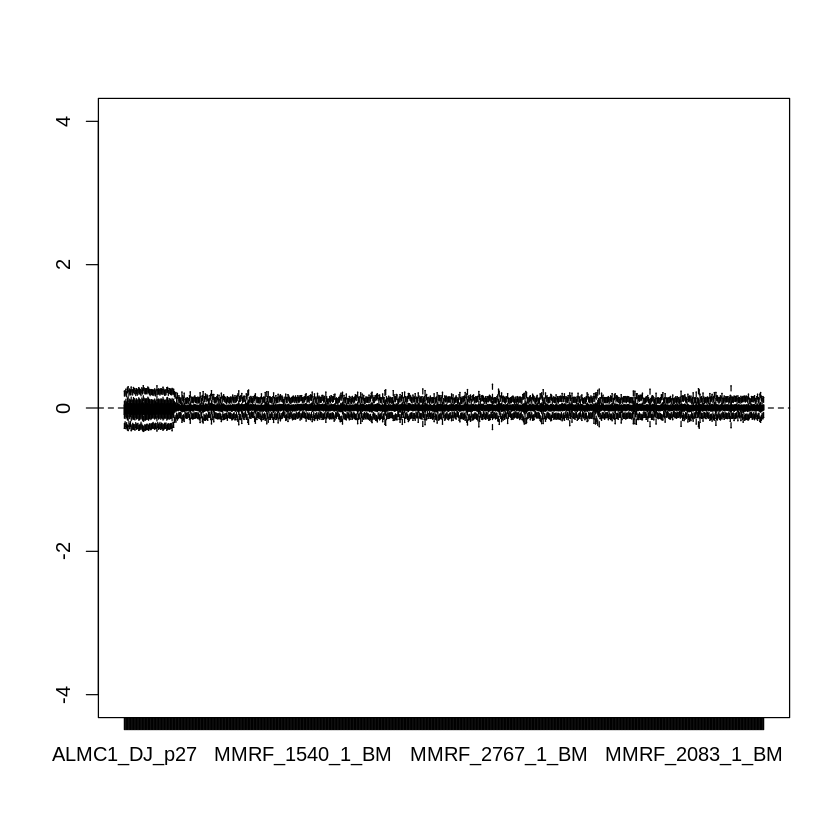

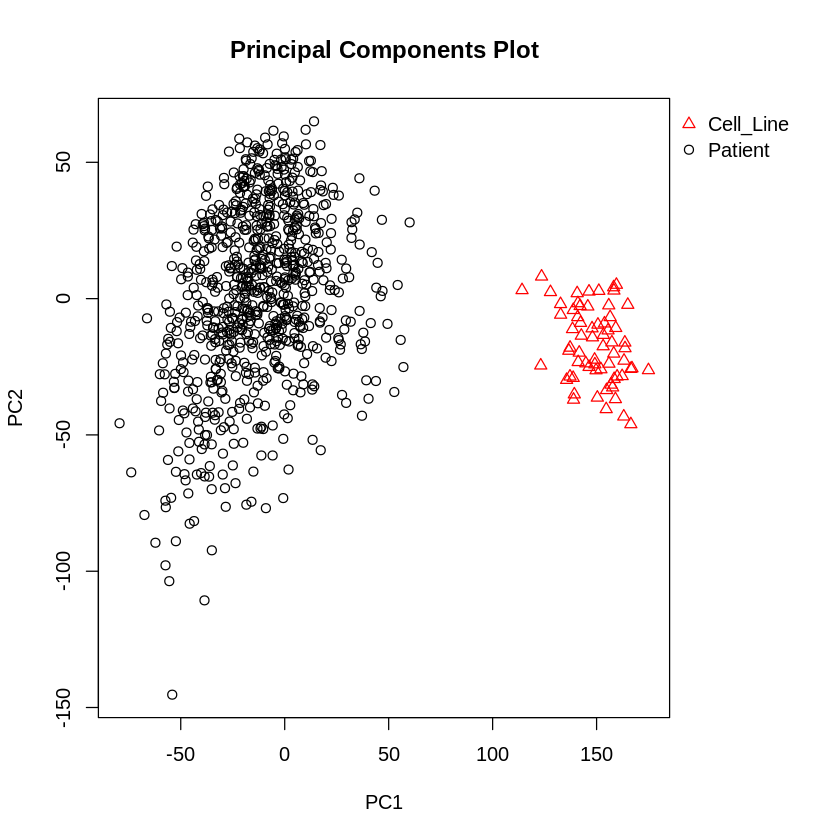

In [8]:
combined_annot = data.frame(colnames(MM_combined.filtered))
combined_annot$type = "Patient"
combined_annot$type[1:ncol(MM_cell_line[-1])] = "Cell_Line"
rn = combined_annot[,1]
combined_annot = combined_annot[-1]
rownames(combined_annot) = rn
setv = vst(as.matrix(round(MM_combined.filtered)))
setv = newSeqExpressionSet(setv, phenoData = combined_annot)

#utilizing varaince stabilization normalization method, vst(), then creating new seqExpressionSet object, 
    #using normalized counts

symbols = c(rep(2, ncol(MM_cell_line[-1])), rep(1, ncol(MM_patients)))
plotRLE(setv, outline=FALSE, ylim=c(-4, 4))
affycoretools::plotPCA(setv, groupnames = c('Cell_Line', 'Patient'), 
                       pch = symbols, col = symbols, outside = TRUE)

In [ ]:
MM_patient_ids = data.frame(colnames(MM_patients))
MM_patients_new = filter(MM_patient_ids, str_extract(MM_patient_ids[,1], "_[0-9]_") == "_1_")
keepc = colnames(MM_patients) %in% MM_patients_new[,1]
MM_patients = MM_patients[,keepc]

In [10]:
keepi = apply(MM_patients_cpm, 1, IQR)

keepis = sort(keepi, decreasing = TRUE)

keepi = keepi %in% keepis[1:5000]
#head(keepi)

MM_combined.filtered = MM_combined.filtered[keepi, ]

head(MM_combined.filtered)

,ALMC1_DJ_p27,ALMC2_DJ_p11,AMO1_DSMZ_p8,ANBL6_DJ2_p13,COLO677_DSMZ_p8,Delta47_JCRB_p16,DP6_DJ_p7,EJM_DSMZ_p9,FLAM76_JCRB_p10,FR4_p6,⋯,MMRF_1731_1_BM,MMRF_2799_1_BM,MMRF_2379_1_BM,MMRF_1474_1_BM,MMRF_1641_1_BM,MMRF_2795_1_BM,MMRF_2316_1_BM,MMRF_2440_1_BM,MMRF_2731_1_BM,MMRF_1355_1_BM
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ENSG00000001036,157,2238,5620,4786,7363,2392,8351,2484,1835,3398,⋯,2079,1843,5195,911,548,1305,4679,1419,695,701
ENSG00000001167,4072,4599,5967,3929,4719,1904,3588,1723,2638,2690,⋯,1594,618,2008,2422,949,406,1361,2132,2587,891
ENSG00000001461,3219,7702,5276,6154,3652,3768,4191,4368,4302,1346,⋯,1779,396,3055,3365,1389,160,640,2322,2107,715
ENSG00000001497,6102,4894,4204,6809,9480,2995,5036,2438,4184,6052,⋯,1941,2018,1806,2113,3076,1163,1580,1892,2624,765
ENSG00000001561,4226,4260,2735,1179,721,1472,4159,980,1475,573,⋯,472,399,4997,804,136,197,1055,1358,1394,717
ENSG00000001629,7506,7626,5787,12231,8093,2304,10061,5778,5149,2275,⋯,1936,1483,3710,4631,1900,991,1887,3401,6707,1122


In [11]:
keepi = apply(MM_patients_cpm, 1, IQR)
keepis = sort(keepi, decreasing = TRUE)
keepi = keepi %in% keepis[1:5000]
head(keepi)
head(keepis)


[1] FALSE FALSE FALSE FALSE FALSE FALSE

ENSG00000211896 ENSG00000132465 ENSG00000211895 ENSG00000166710 ENSG00000156508 
     179463.493       15492.954        5737.986        5061.255        4431.743 
ENSG00000198804 
       4104.130

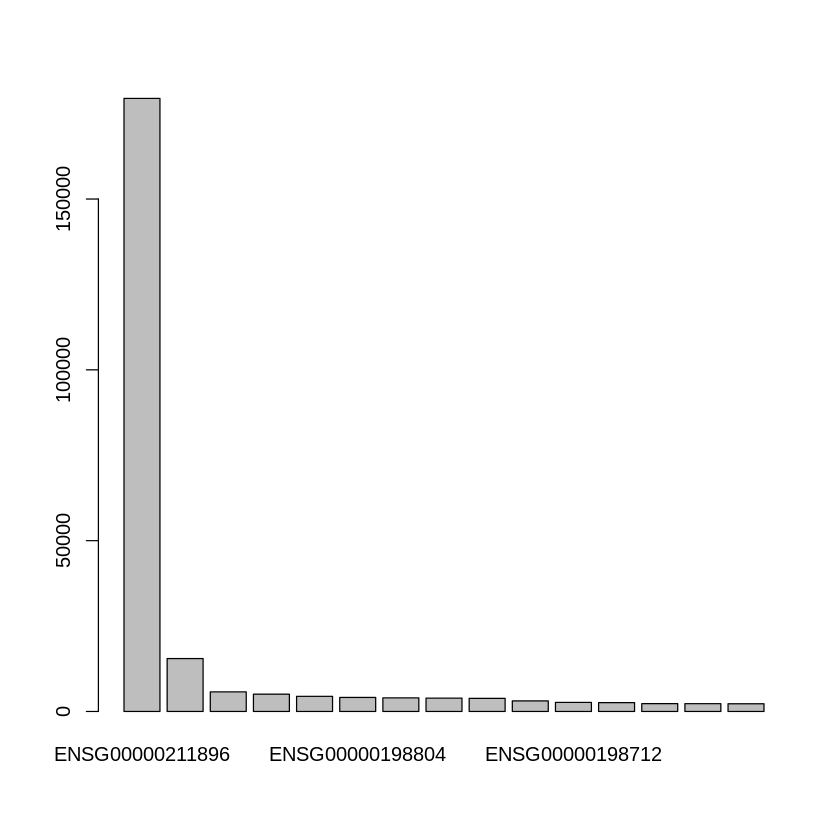

In [12]:
barplot(keepis[1:15])

In [14]:
tail(keepis[1:5000])

ENSG00000175756 ENSG00000099901 ENSG00000100605 ENSG00000092847 ENSG00000083097 
       16.97876        16.97014        16.96993        16.96946        16.96134 
ENSG00000125812 
       16.96001

In [18]:
hist(MM_combined.filtered['ENSG00000211896',])
